In [1]:
import torch

In [2]:
import pandas as pd

pd.option_context("display.max_rows", 200, "display.max_columns", 200)
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load FICO HELOC data with special values converted to np.nan
from aix360.datasets.heloc_dataset import HELOCDataset, nan_preprocessing
data = HELOCDataset(custom_preprocessing=nan_preprocessing).data()
# Separate target variable
y = data.pop('RiskPerformance')

# Split data into training and test sets using fixed random seed
from sklearn.model_selection import train_test_split
dfTrain, dfTest, yTrain, yTest = train_test_split(data, y, random_state=0, stratify=y)

train, test = dfTrain, dfTest

dfTrain.head().transpose()

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html
Using TensorFlow backend.


,8960,8403,1949,4886,4998
ExternalRiskEstimate,64.0,57.0,59.0,65.0,65.0
MSinceOldestTradeOpen,175.0,47.0,168.0,228.0,117.0
MSinceMostRecentTradeOpen,6.0,9.0,3.0,5.0,7.0
AverageMInFile,97.0,35.0,38.0,69.0,48.0
NumSatisfactoryTrades,29.0,5.0,21.0,24.0,7.0
NumTrades60Ever2DerogPubRec,9.0,1.0,0.0,3.0,1.0
NumTrades90Ever2DerogPubRec,9.0,0.0,0.0,2.0,1.0
PercentTradesNeverDelq,63.0,50.0,100.0,85.0,78.0
MSinceMostRecentDelq,2.0,16.0,NaN,3.0,36.0
MaxDelq2PublicRecLast12M,4.0,6.0,7.0,0.0,6.0


In [4]:
type(dfTrain)

pandas.core.frame.DataFrame

In [5]:
# Binarize data and also return standardized ordinal features
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True, returnOrd=True)
dfTrain, dfTrainStd = fb.fit_transform(dfTrain)
dfTest, dfTestStd = fb.transform(dfTest)
dfTrain['ExternalRiskEstimate'].head()

/home/yannick/Work/github/AIX360/aix360/algorithms/rbm/features.py:154: RuntimeWarning: invalid value encountered in less_equal
  Anew = (data[c].values[:, np.newaxis] <= thresh[c]).astype(int)
/home/yannick/Work/github/AIX360/aix360/algorithms/rbm/features.py:154: RuntimeWarning: invalid value encountered in less_equal
  Anew = (data[c].values[:, np.newaxis] <= thresh[c]).astype(int)


operation   <=                                            >                 \
value     59.0 63.0 66.0 69.0 72.0 75.0 78.0 82.0 86.0 59.0 63.0 66.0 69.0   
8960         0    0    1    1    1    1    1    1    1    1    1    0    0   
8403         1    1    1    1    1    1    1    1    1    0    0    0    0   
1949         1    1    1    1    1    1    1    1    1    0    0    0    0   
4886         0    0    1    1    1    1    1    1    1    1    1    0    0   
4998         0    0    1    1    1    1    1    1    1    1    1    0    0   

operation                           ==  !=  
value     72.0 75.0 78.0 82.0 86.0 NaN NaN  
8960         0    0    0    0    0   0   1  
8403         0    0    0    0    0   0   1  
1949         0    0    0    0    0   0   1  
4886         0    0    0    0    0   0   1  
4998         0    0    0    0    0   0   1

In [20]:
dfTrainStd.describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,7403.0,-6.373097e-16,0.999527,-3.966278,-0.812130,0.001844,0.815817,2.240271
MSinceOldestTradeOpen,7403.0,6.814607e-17,0.987903,-2.005837,-0.662866,-0.133817,0.558016,6.123205
MSinceMostRecentTradeOpen,7403.0,-4.079166e-17,1.000068,-0.739269,-0.506466,-0.273663,0.191943,28.981909
AverageMInFile,7403.0,7.198528e-17,1.000068,-2.182990,-0.639265,-0.085854,0.525810,8.856099
NumSatisfactoryTrades,7403.0,1.041387e-16,1.000068,-1.862798,-0.717271,-0.100449,0.604491,5.098481
NumTrades60Ever2DerogPubRec,7403.0,-6.622646e-17,1.000068,-0.471027,-0.471027,-0.471027,0.326734,13.090913
NumTrades90Ever2DerogPubRec,7403.0,2.015588e-17,1.000068,-0.388008,-0.388008,-0.388008,-0.388008,15.351314
PercentTradesNeverDelq,7403.0,-1.478098e-16,1.000068,-7.801289,-0.273269,0.403407,0.657161,0.657161
MSinceMostRecentDelq,7403.0,2.879411e-18,0.717538,-1.059810,-0.389280,0.000000,0.000000,2.915472
MaxDelq2PublicRecLast12M,7403.0,-1.055784e-16,1.000068,-3.497642,-0.460477,0.146956,0.754388,1.969254


In [8]:
from sklearn.metrics import roc_auc_score, average_precision_score

def print_roc_ap(clf, X, y, X_test, y_test, X_std=None, X_test_std=None):
    
    def pp(X, X_std):
        return clf.predict_proba(X) if X_std is None else clf.predict_proba(X, X_std)
    
    print("Test AUC = %.4f" % roc_auc_score(y_test, pp(X_test, X_test_std)))
    print("Train AUC = %.4f" % roc_auc_score(y, pp(X, X_std)))

    print("Test AP = %.4f" % average_precision_score(y_test, pp(X_test, X_test_std)))
    print("Train AP = %.4f" % average_precision_score(y, pp(X, X_std)))

In [9]:
%time

# Instantiate LRR with good complexity penalties and numerical features
from aix360.algorithms.rbm import LogisticRuleRegression
lrr = LogisticRuleRegression(lambda0=0.0005, lambda1=0.0005, useOrd=False)

# Train, print, and evaluate model
lrr.fit(dfTrain, yTrain)

print_roc_ap(lrr, dfTrain, yTrain, dfTest, yTest)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs


/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test AUC = 0.7925
Train AUC = 0.8187
Test AP = 0.7754
Train AP = 0.7982


In [10]:
print(lrr.explain().shape)

lrr.explain().sort_values(by="coefficient")

(95, 2)


,rule,coefficient
2,MaxDelq2PublicRecLast12M <= 5.00,-1.19179
0,(intercept),-1.18723
5,NumRevolvingTradesWBalance > 8.00,-0.661048
7,PercentInstallTrades <= 14.00,-0.599212
8,AverageMInFile <= 52.00,-0.597787
10,NumSatisfactoryTrades <= 12.00,-0.573844
12,MSinceMostRecentDelq <= 15.00,-0.564134
14,PercentTradesNeverDelq <= 77.00,-0.55116
15,NetFractionRevolvingBurden > 79.00,-0.525984
16,PercentTradesNeverDelq <= 95.00,-0.51973


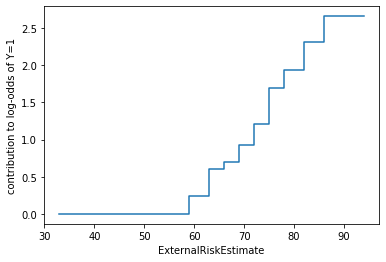

In [11]:
lrr.visualize(data, fb, ['ExternalRiskEstimate']);

/home/yannick/Work/github/AIX360/aix360/algorithms/rbm/logistic_regression.py:438: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs[f] = plt.figure()


({'ExternalRiskEstimate': <Figure size 432x288 with 1 Axes>,
  'NumSatisfactoryTrades': <Figure size 432x288 with 1 Axes>,
  'NetFractionRevolvingBurden': <Figure size 432x288 with 1 Axes>,
  'MSinceMostRecentInqexcl7days': <Figure size 432x288 with 1 Axes>,
  'AverageMInFile': <Figure size 432x288 with 1 Axes>,
  'PercentTradesNeverDelq': <Figure size 432x288 with 1 Axes>,
  'MaxDelq2PublicRecLast12M': <Figure size 432x288 with 1 Axes>,
  'NumRevolvingTradesWBalance': <Figure size 432x288 with 1 Axes>,
  'PercentInstallTrades': <Figure size 432x288 with 1 Axes>,
  'NumBank2NatlTradesWHighUtilization': <Figure size 432x288 with 1 Axes>,
  'NumInqLast6M': <Figure size 432x288 with 1 Axes>,
  'MSinceMostRecentDelq': <Figure size 432x288 with 1 Axes>,
  'NumTotalTrades': <Figure size 432x288 with 1 Axes>,
  'MSinceOldestTradeOpen': <Figure size 432x288 with 1 Axes>,
  'PercentTradesWBalance': <Figure size 432x288 with 1 Axes>,
  'MaxDelqEver': <Figure size 432x288 with 1 Axes>,
  'NetFrac

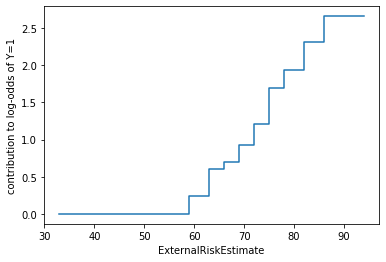

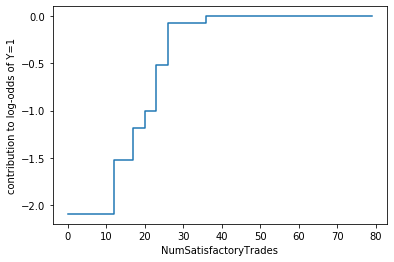

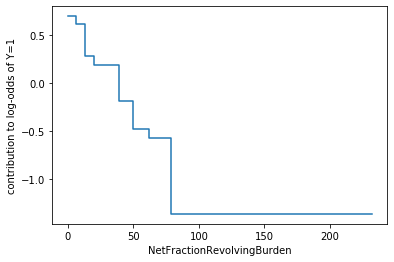

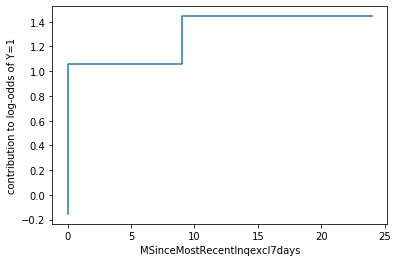

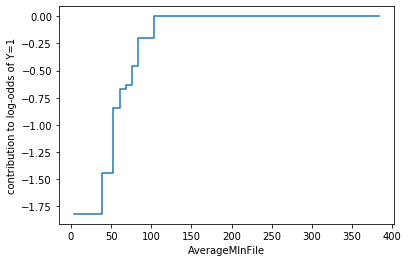

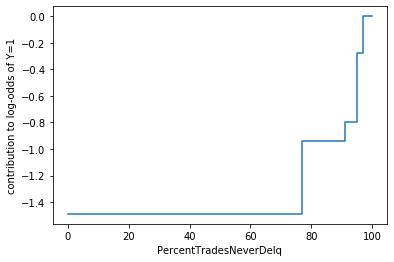

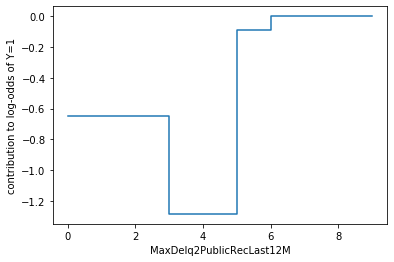

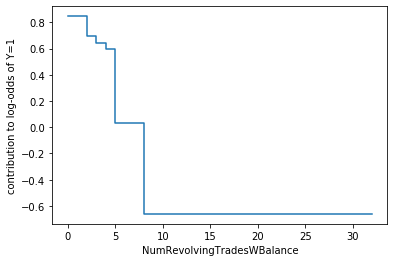

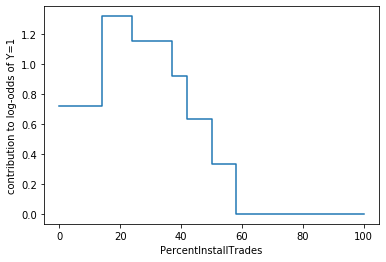

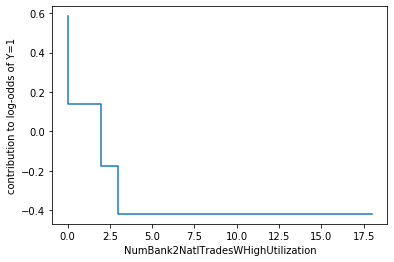

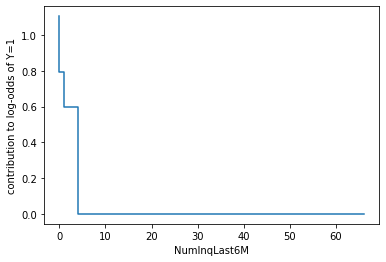

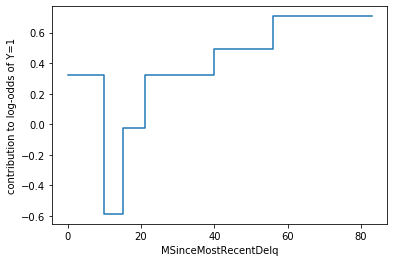

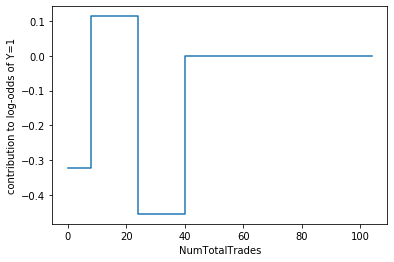

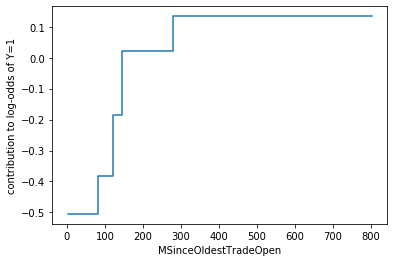

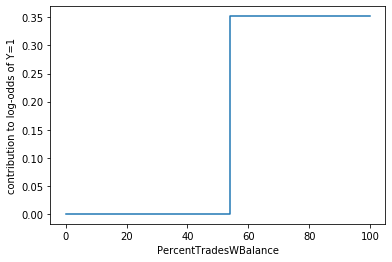

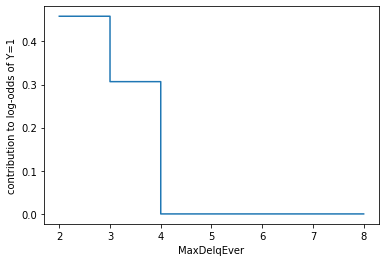

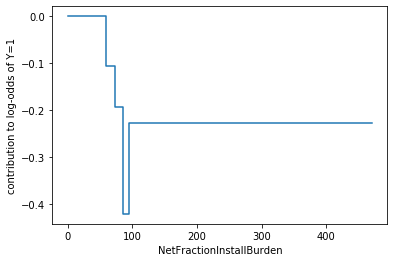

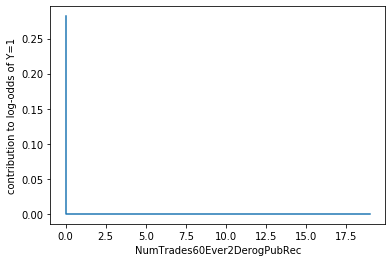

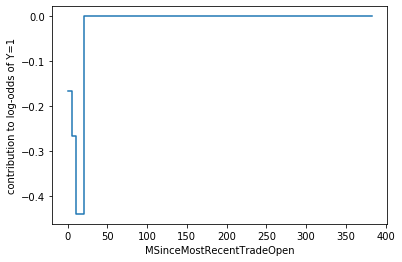

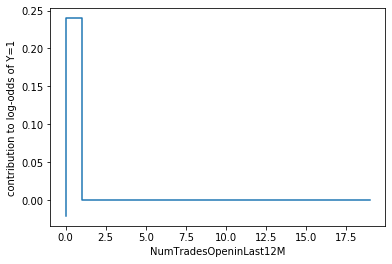

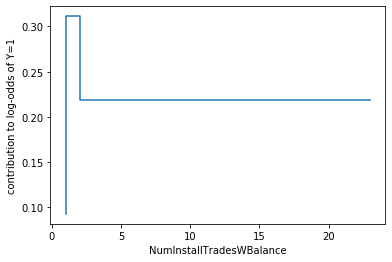

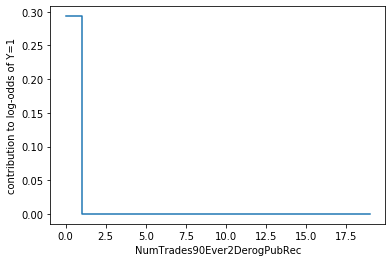

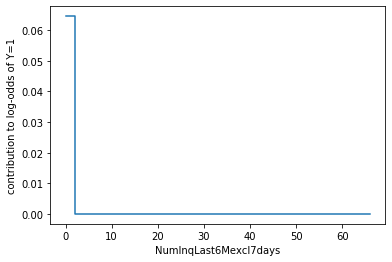

In [12]:
lrr.visualize(data, fb, dfTrain.columns)

In [13]:
%%time

# Instantiate LRR with good complexity penalties and numerical features
from aix360.algorithms.rbm import LogisticRuleRegression
lrr2 = LogisticRuleRegression(lambda0=0.0005, lambda1=0.001, useOrd=True)

# Train, print, and evaluate model
lrr2.fit(dfTrain, yTrain, dfTrainStd)

print_roc_ap(lrr2, dfTrain, yTrain, dfTest, yTest, dfTrainStd, dfTestStd)

/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/An

Test AUC = 0.7914
Train AUC = 0.8189
Test AP = 0.7712
Train AP = 0.7982
CPU times: user 1min 13s, sys: 1.24 s, total: 1min 15s
Wall time: 37.6 s


In [14]:
print(lrr2.explain().shape)

lrr2.explain().sort_values(by="coefficient")

(70, 2)


,rule/numerical feature,coefficient
1,MaxDelq2PublicRecLast12M <= 5.00,-1.18463
2,PercentTradesNeverDelq <= 77.00,-1.15976
4,MSinceMostRecentInqexcl7days <= 0.00,-1.07305
7,PercentTradesNeverDelq <= 95.00,-0.878997
0,(intercept),-0.871703
9,NetFractionRevolvingBurden,-0.819214
10,PercentInstallTrades <= 14.00,-0.789477
11,MSinceMostRecentTradeOpen <= 20.00,-0.768526
12,AverageMInFile <= 52.00,-0.733238
16,NumTotalTrades <= 8.00,-0.566484


/home/yannick/Work/github/AIX360/aix360/algorithms/rbm/logistic_regression.py:438: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs[f] = plt.figure()


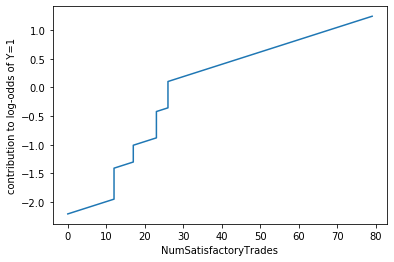

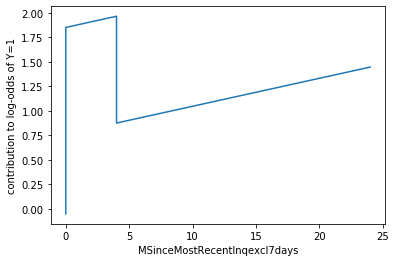

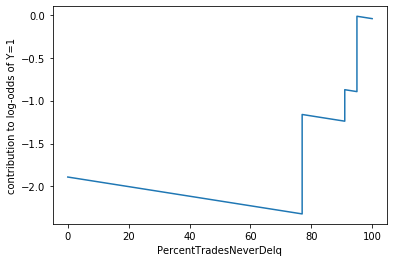

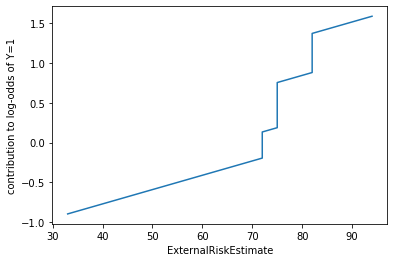

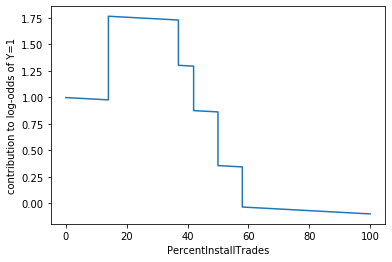

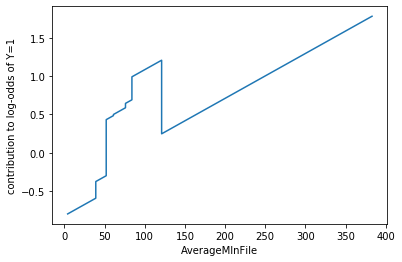

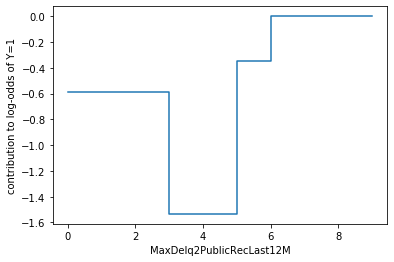

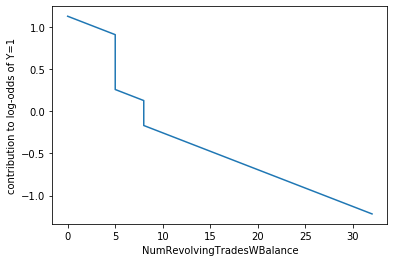

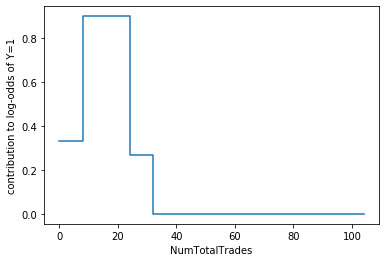

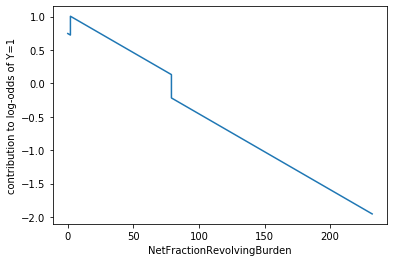

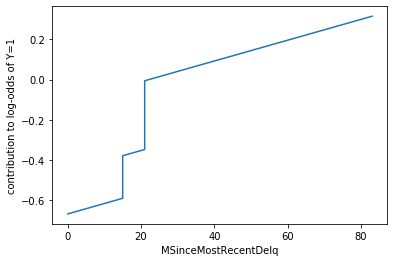

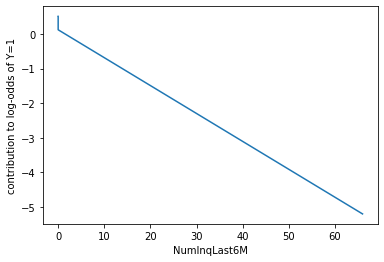

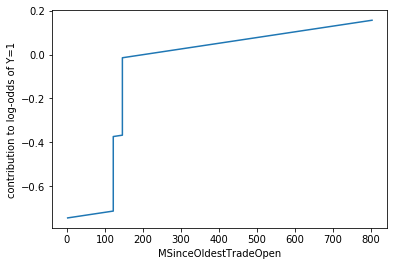

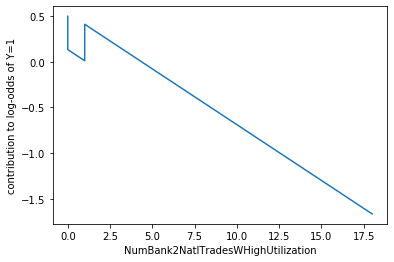

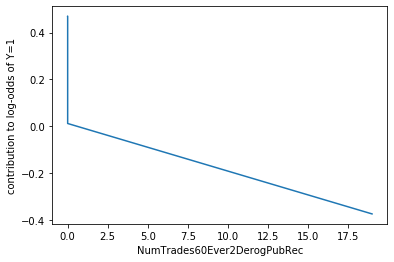

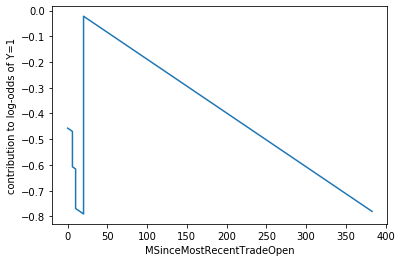

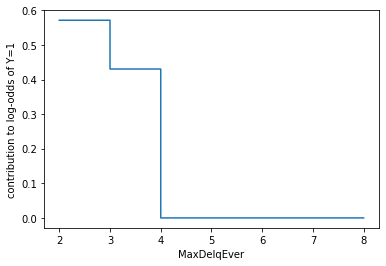

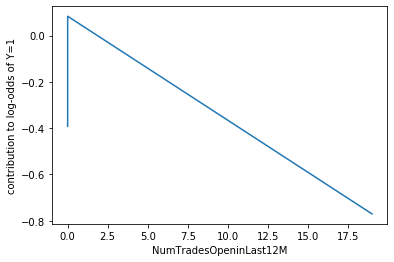

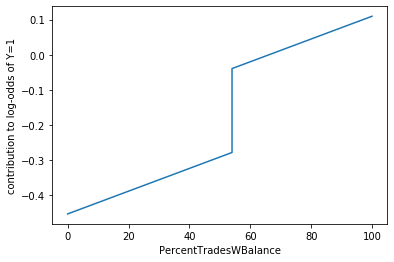

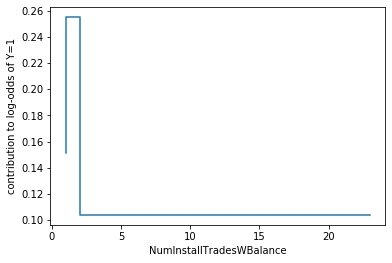

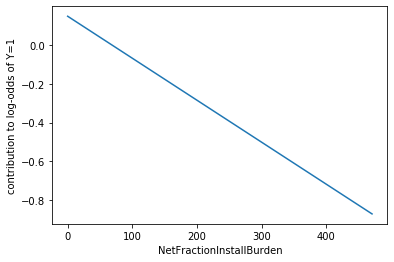

In [15]:
lrr2.visualize(data, fb, dfTrain.columns);

In [16]:
%%time

# Instantiate LRR with good complexity penalties and numerical features
from aix360.algorithms.rbm import LogisticRuleRegression
lrr3 = LogisticRuleRegression(lambda0=0.001, lambda1=0.001, useOrd=True)

# Train, print, and evaluate model
lrr3.fit(dfTrain, yTrain, dfTrainStd)

print_roc_ap(lrr3, dfTrain, yTrain, dfTest, yTest, dfTrainStd, dfTestStd)

/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/An

Test AUC = 0.7926
Train AUC = 0.8169
Test AP = 0.7740
Train AP = 0.7960
CPU times: user 56.4 s, sys: 1.01 s, total: 57.5 s
Wall time: 28.4 s


In [17]:
print(lrr3.explain().shape)

lrr3.explain().sort_values(by="coefficient")

(53, 2)


,rule/numerical feature,coefficient
0,(intercept),-0.857403
2,MaxDelq2PublicRecLast12M <= 5.00,-0.715256
5,AverageMInFile <= 52.00,-0.587995
6,NetFractionRevolvingBurden,-0.570873
7,PercentInstallTrades <= 14.00,-0.544516
9,PercentTradesNeverDelq <= 95.00,-0.469977
10,NumInqLast6M,-0.447684
13,NumBank2NatlTradesWHighUtilization,-0.350334
15,NumSatisfactoryTrades <= 12.00,-0.340448
18,AverageMInFile <= 39.00,-0.310895


In [18]:
%%time

# Instantiate LRR with good complexity penalties and numerical features
from aix360.algorithms.rbm import LogisticRuleRegression
lrr4 = LogisticRuleRegression(lambda0=0.01, lambda1=0.0001, useOrd=True)

# Train, print, and evaluate model
lrr4.fit(dfTrain, yTrain, dfTrainStd)

print_roc_ap(lrr4, dfTrain, yTrain, dfTest, yTest, dfTrainStd, dfTestStd)

/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/Anaconda3-2019.07/envs/aix360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yannick/bin/An

Test AUC = 0.7867
Train AUC = 0.8091
Test AP = 0.7707
Train AP = 0.7873
CPU times: user 2min 11s, sys: 2.09 s, total: 2min 13s
Wall time: 1min 4s


In [19]:
print(lrr4.explain().shape)

lrr4.explain().sort_values(by="coefficient")

(32, 2)


,rule/numerical feature,coefficient
0,(intercept),-1.67284
3,NetFractionRevolvingBurden,-0.535892
12,NumSatisfactoryTrades <= 12.00,-0.196612
14,AverageMInFile <= 84.00,-0.172483
15,MSinceOldestTradeOpen <= 146.00,-0.172089
18,AverageMInFile <= 61.00,-0.119836
19,MSinceMostRecentInqexcl7days <= 0.00,-0.104535
24,NumSatisfactoryTrades <= 23.00,-0.0706973
27,NumSatisfactoryTrades <= 17.00,-0.064032
29,AverageMInFile <= 76.00,-0.0566984


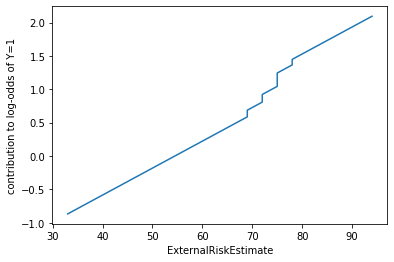

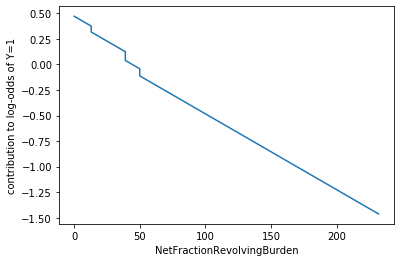

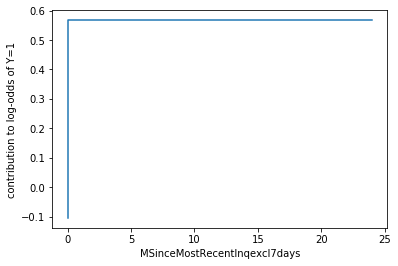

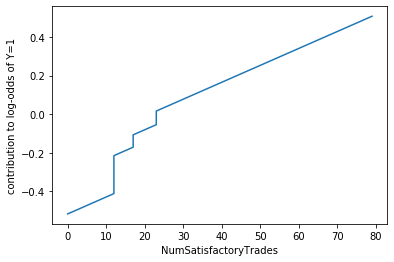

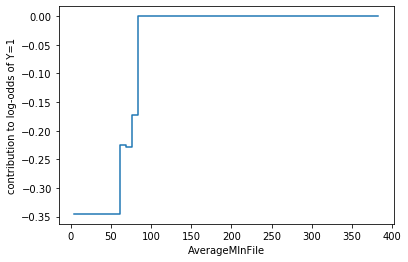

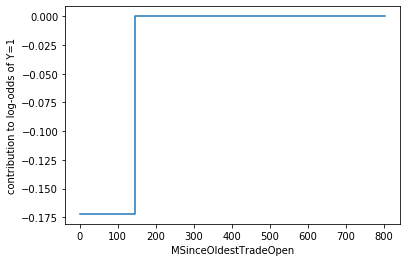

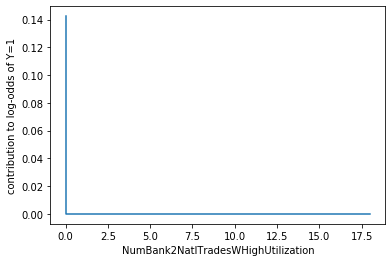

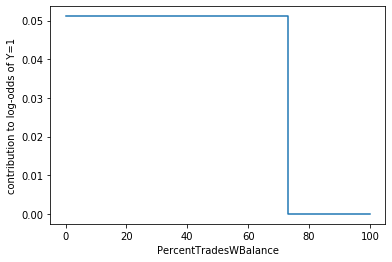

In [21]:
lrr4.visualize(data, fb, dfTrain.columns);